# Zero-Shot Experiments

## Run predictions

On server via predict_zero_shot.py 

## Parse predictions

### Study Type

In [ ]:
import sys
import os

# enable import from parent directory
sys.path.append(os.path.abspath('..'))

import os
import json
import pandas as pd
import numpy as np
from zero_shot.predict_zero_shot import parse_class_predictions, parse_ner_predictions
from evaluation.evaluate import get_performance_report

study_type_path = "study_type"
task = "Study Type"


In [29]:

performance_dicts = {}  # Skip non-CSV files

for file in os.listdir(study_type_path):
    if not file.endswith('.csv'):
        continue
    print(f"Processing file: {file}")
    file_path = os.path.join(study_type_path, file)
    parse_class_predictions(file_path, task)
    file_parts = file.split('_')
    model = file_parts[-2] + '_' + file_parts[-1].replace('.csv', '')
    print(model)
    df = pd.read_csv(file_path)
    performance_dicts[model] = get_performance_report('labels', 'pred_labels', df)



def convert_numpy(obj):
    if isinstance(obj, dict):
        return {k: convert_numpy(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [convert_numpy(v) for v in obj]
    elif isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    else:
        return obj

# Convert numpy types to native Python types
performance_dicts = convert_numpy(performance_dicts)

# dump the performance report
performance_report_path = os.path.join(study_type_path, "performance_report.json")
with open(performance_report_path, "w") as f:
    json.dump(performance_dicts, f, indent=4)


Processing file: study_type_gpt-4o-mini_22-07-22.csv
gpt-4o-mini_22-07-22
Computing F1 score and confidence interval...
Running bootstrap for custom_f1...
Computing accuracy and confidence interval...
Running bootstrap for custom_accuracy...
Computing precision and confidence interval...
Running bootstrap for custom_precision...
Computing recall and confidence interval...
Running bootstrap for custom_recall...
Processing file: study_type_gpt-4o-mini_05-06-05.csv
gpt-4o-mini_05-06-05
Computing F1 score and confidence interval...
Running bootstrap for custom_f1...
Computing accuracy and confidence interval...
Running bootstrap for custom_accuracy...
Computing precision and confidence interval...
Running bootstrap for custom_precision...
Computing recall and confidence interval...
Running bootstrap for custom_recall...
Processing file: study_type_MeLLaMA-13B-chat_22-07-22.csv
MeLLaMA-13B-chat_22-07-22
Computing F1 score and confidence interval...
Running bootstrap for custom_f1...
Computi

#### Make performance Plot

In [1]:


def add_bert_performance_data(task: str, performance_data_path: str):
    with open(performance_report_path, "r") as f:
        performance_data = json.load(f)

    bert_data = {}
    bert_path = '/home/vera/Documents/Uni/Master/Master_Thesis2.0/PsyNamic-Scale/bert_baseline'
    model = None
    for metric in ['f1', 'accuracy', 'precision', 'recall']:
        # find best_accuracy_scores.csv ect. files
        file_path = f'best_{metric}_scores.csv'
        df = pd.read_csv(os.path.join(bert_path, file_path))
        # get row from task
        task_row = df[df['task'] == task]

        score = float(task_row[f'{metric}_score'].values[0])
        ci_lower = float(task_row['ci_lower'].values[0])
        ci_upper = float(task_row['ci_upper'].values[0])
        score_data = [score, [ci_lower, ci_upper]]

        if metric == 'f1':
            metric = 'f1-weighted'
        bert_data[metric] = score_data
        model = task_row['model'].values[0]  # Assuming the model is the same for all metrics

    # Add clinicalbert to performance_data if not present
    performance_data[model] = {'metrics': {}, 'nr_empty_tru': 0}

    performance_data[model]['metrics'] = bert_data

    # save new performance data
    with open(performance_report_path, "w") as f:
        json.dump(performance_data, f, indent=4)

    return performance_data

   


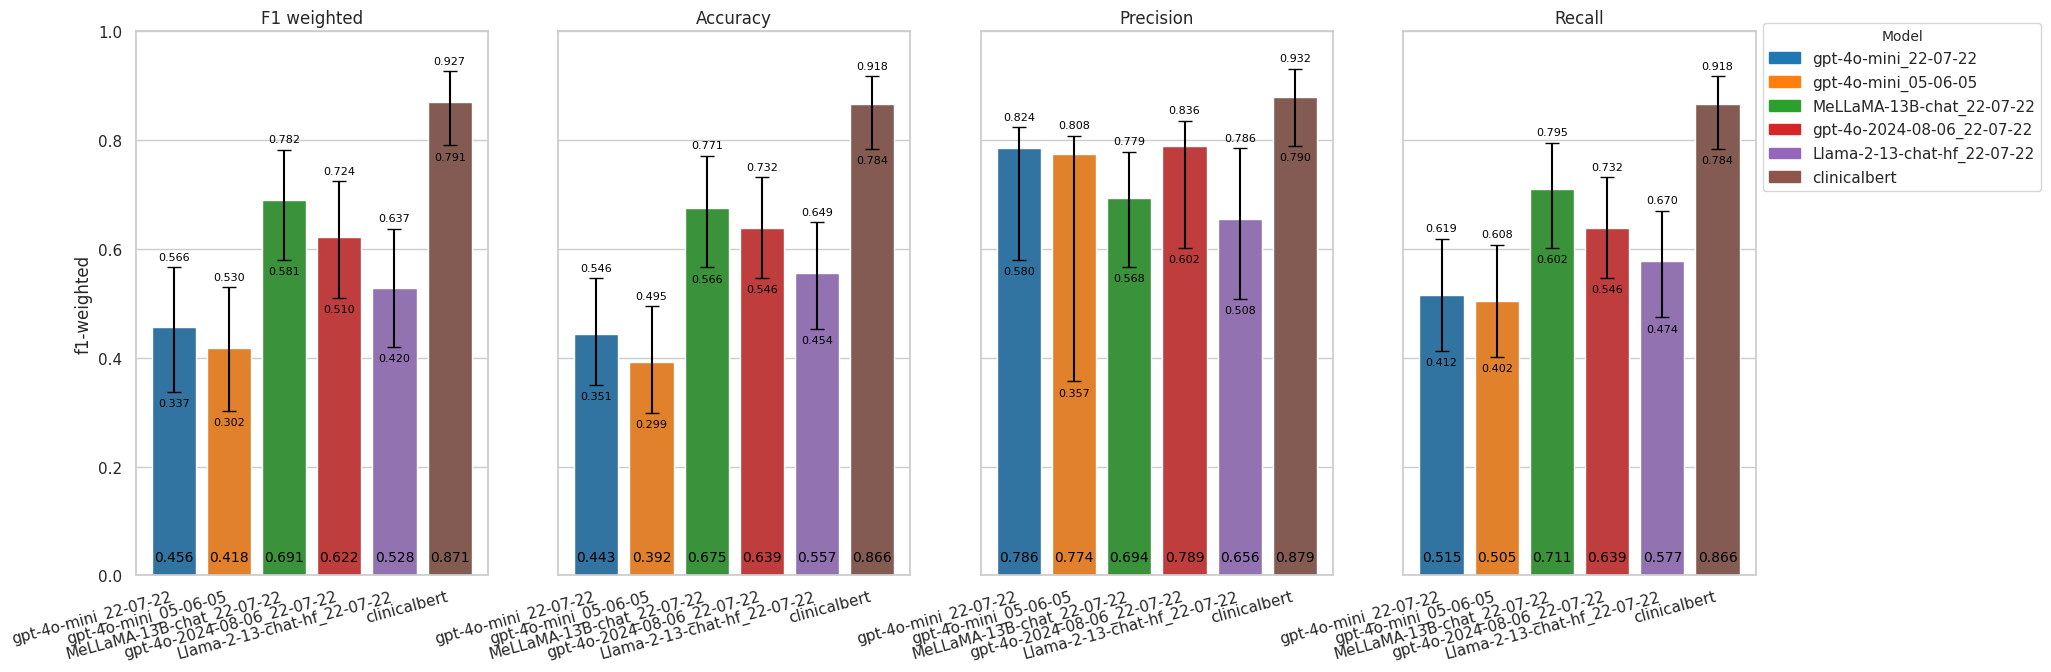

In [4]:
from plots.plots import make_performance_plot
# load performance report
performance_report_path = os.path.join(study_type_path, "performance_report.json")


performance_data = add_bert_performance_data(task, performance_report_path)
make_performance_plot(performance_data)



### NER

In [ ]:
for file in os.listdir('ner'):
    if not file.endswith('.csv'):
        continue
    print(f"Processing file: {file}")
    file_path = os.path.join(study_type_path, file)
    parse_ner_predictions(file_path, task)
    file_parts = file.split('_')
    model = file_parts[-2] + '_' + file_parts[-1].replace('.csv', '')
    print(model)
    df = pd.read_csv(file_path)
    performance_dicts[model] = get_performance_report('labels', 'pred_labels', df)

